In [1]:
import glob
import datetime  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.basemap import Basemap
import matplotlib.colors as co

In [4]:
kt2ms = 0.514444

cat_name   = ['TD', 'TS', 'HU1', 'HU2', 'HU3', 'HU4','HU5']
cat_thresh = np.array([34.,   63.,   82.,   95.,   112., 136.])
colors = {'TD': 'blue', 
          'TS': 'green', 
          'HU1': 'cyan', 
          'HU2': 'gold', 
          'HU3': 'coral', 
          'HU4': 'crimson',
          'HU5': 'brown'}

legend_order = {'TD': 0, 
          'TS': 1, 
          'HU1': 2, 
          'HU2': 3, 
          'HU3': 4, 
          'HU4': 5,
          'HU5': 6}

cat_thresh_ms = cat_thresh*kt2ms

#### 1 IBTrACS

CPU times: user 3min 43s, sys: 5.79 s, total: 3min 48s
Wall time: 8min 22s


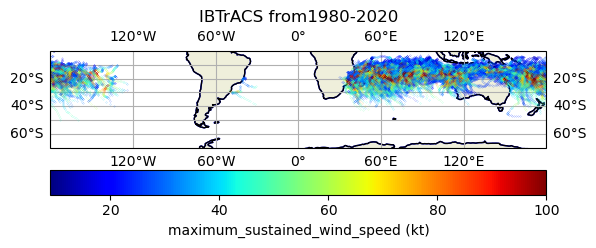

In [5]:
%%time
#https://case-studies.readthedocs.io/en/latest/TC_Tracks_Intensity.html
# intensity
#https://blog.csdn.net/shayuxing/article/details/124006042

year_s = 1980
year_e = 2020

flnm_ib = '/glade/work/mingge/TC_DBS/IBTrACS.ALL.v04r00.nc'
ds = xr.open_dataset(flnm_ib)

lat = ds.usa_lat
lon = ds.usa_lon
wind10 = ds.usa_wind.data
stormYear = ds.season.data  # year based on season
number = ds.number.data
time2d = ds.iso_time.data
basin  = ds.basin.data
basin1 = basin[:,0]

tcmask = np.where((stormYear >= year_s) &(stormYear <= year_e))
latselect    = lat[tcmask]
lonselect    = lon[tcmask]
spdselect    = wind10[tcmask]
timeselect   = time2d[tcmask]
numberselect = number[tcmask]

# no fig
#fig, ax = plt.subplots(figsize=(12,8))

ax = plt.axes(projection=ccrs.PlateCarree())
#ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=-180))
ax.coastlines()
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
ax.set_extent([-180, 180, -70, 0])

ax.add_feature(cfeature.OCEAN,facecolor='white')
ax.set_title('IBTrACS from' + str(year_s) + '-' + str(year_e))
ax.add_feature(cfeature.LAND, edgecolor='b')

# Prepare color map based on vortex center maximum wind speed
cmap=plt.cm.jet
norm=co.Normalize(vmin=9, vmax=100)
colors=plt.cm.ScalarMappable(norm,cmap)
 
for ii in range(len(numberselect)):
    lat_all = np.array(latselect[ii,:])
    lat_1d = lat_all[~np.isnan(lat_all)]
    
    lon_1d = np.array(lonselect[ii,:]) 
    lon_1d = lon_1d[~np.isnan(lat_all)]

    spd_1d = np.array(spdselect[ii,:])
    spd_1d = spd_1d[~np.isnan(lat_all)]
     
    if len(lon_1d)>0:
        col=colors.to_rgba(spd_1d)
        if (lon_1d.max() - lon_1d.min()) >180:
            # discontinue at longitude 0
            lon_1d =np.where(lon_1d < 0, lon_1d+360, lon_1d)
        for nn in range(len(lon_1d)):      
            #ax.plot(lon_1d, lat_1d, color='k', linewidth=0.1, transform=ccrs.PlateCarree())
            ax.plot(lon_1d[nn], lat_1d[nn],  marker='.', markersize=0.2, color=col[nn,:], transform=ccrs.PlateCarree())
            
plt.colorbar(colors,fraction=0.1, pad=0.06,label='maximum_sustained_wind_speed (kt)', orientation='horizontal')   
 

CPU times: user 8.54 s, sys: 124 ms, total: 8.66 s
Wall time: 9.76 s


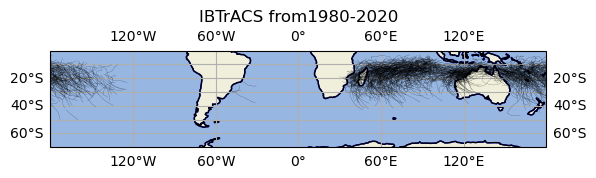

In [7]:
%%time
#https://blog.csdn.net/shayuxing/article/details/124006042

dir_data = '/glade/campaign/mmm/c3we/done/pcast/CESM2_LENS/'
dir_hr   = '/glade/campaign/mmm/c3we/done/pcast/CESM_HR/'
cat_name   = ['TD', 'TS', 'HU1', 'HU2', 'HU3', 'HU4','HU5']
cat_thresh = np.array([34.,   63.,   82.,   95.,   112., 136.])
ms2kt = 1.94384
flnms = [ff for ff in glob.glob(dir_data + "*WeakThreshold.txt")]
n_f = len(flnms)

year_s = 1980
year_e = 2020

flnm_ib = '/glade/work/mingge/TC_DBS/IBTrACS.ALL.v04r00.nc'
ds = xr.open_dataset(flnm_ib)

lat = ds.usa_lat
lon = ds.usa_lon
stormYear = ds.season.data  # year based on season
number = ds.number.data
time2d = ds.iso_time.data
basin = ds.basin.data
basin1 = basin[:,0]
tracktype = ds.track_type.data

tcmask = np.where((stormYear >= year_s) &(stormYear <= year_e)) # (basin1==b'NA') & (tracktype==b'main'))

latselect = lat[tcmask]
lonselect = lon[tcmask]
timeselect = time2d[tcmask]
numberselect = number[tcmask]

# no fig
#fig = plt.subplots(figsize=(12,8))

ax = plt.axes(projection=ccrs.PlateCarree())
#ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=-180))
ax.coastlines()
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
ax.set_extent([-180, 180, -70, 0])

ax.add_feature(cfeature.OCEAN)
ax.set_title('IBTrACS from' + str(year_s) + '-' + str(year_e))
ax.add_feature(cfeature.LAND, edgecolor='b')

for ii in range(len(numberselect)):
    lat_1d = np.array(latselect[ii,:])
    lat_1d = lat_1d[~np.isnan(lat_1d)]
    lon_1d = np.array(lonselect[ii,:])
    lon_1d = lon_1d[~np.isnan(lon_1d)]
    if len(lon_1d)>0:
        if (lon_1d.max() - lon_1d.min()) >180:
            # discontinue at longitude 0
            lon_1d =np.where(lon_1d < 0, lon_1d+360, lon_1d)
             
        ax.plot(lon_1d, lat_1d, color='k', linewidth=0.1, transform=ccrs.PlateCarree())
        #cb = ax.scatter(lon_1d, lat_1d, s=5, transform=ccrs.PlateCarree()) 

#### 2 CESM-HR 10 member

CPU times: user 28.3 s, sys: 362 ms, total: 28.6 s
Wall time: 41.2 s


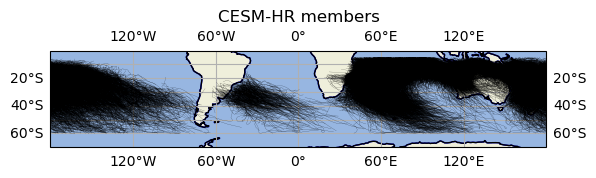

In [8]:
%%time
dir_hr   = '/glade/campaign/mmm/c3we/done/pcast/CESM_HR/'
dirs = [ff for ff in glob.glob(dir_hr + "*")]
 
year_s = 1980
year_e = 2020

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
ax.set_extent([-180, 180, -70, 0])
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, edgecolor='b')
    
ax.set_title('CESM-HR members')
        
for dir in dirs:
    for year in range(year_s, year_e + 1):
        name = dir[len(dir_hr) + 8:-4]
        
        flnm = dir + '/' + 'CESM_HR_TC_'+ name+'_output_' + str(year) + '_SH.txt'
        #print(flnm)  
        df_tc = pd.read_csv(flnm, delimiter=', ', engine='python')
        df = df_tc.loc[df_tc['year'].astype(int) == year]
        tc_ids = np.unique(df.track_id.astype(int))
        
        for tc_id in tc_ids:
            df_single = df.loc[df.track_id.astype(int) == tc_id]
             
            lat_1d = df_single.lat.values.astype(float) 
            lon_1d = df_single.lon.values.astype(float) 
            # discontinue at 180
            if  (lon_1d.max() - lon_1d.min()) >180:
                lon_1d =np.where(lon_1d > 180, lon_1d-360, lon_1d)
            
            ax.plot(lon_1d, lat_1d, color='k', linewidth=0.1, transform=ccrs.PlateCarree()) 
            
      

#### 3.1 tracks for each member 

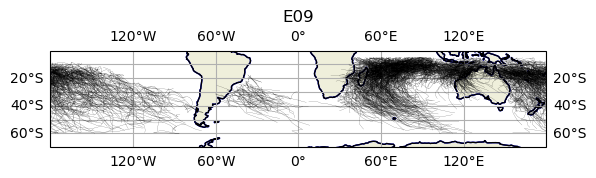

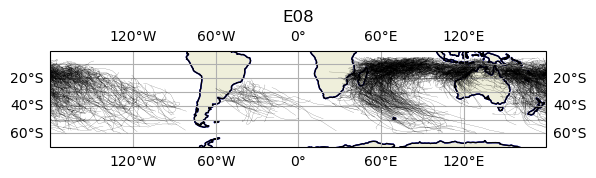

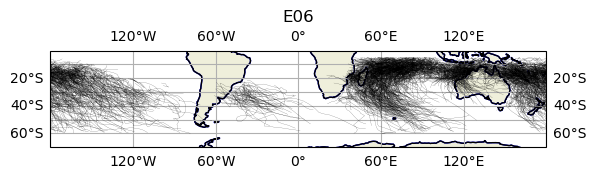

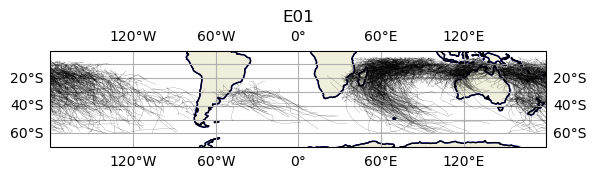

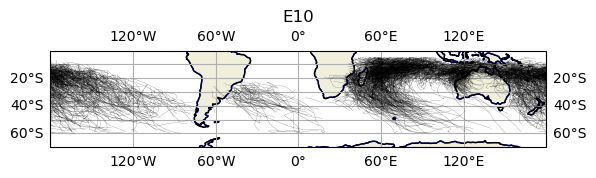

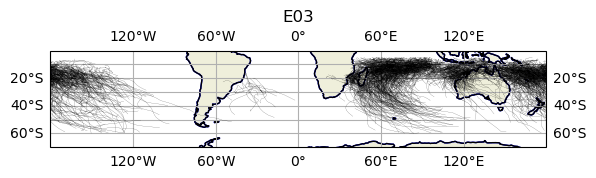

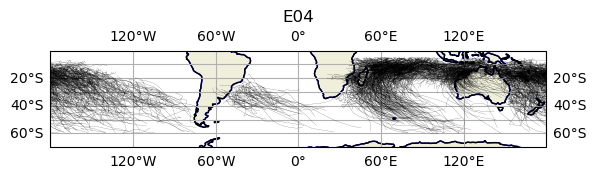

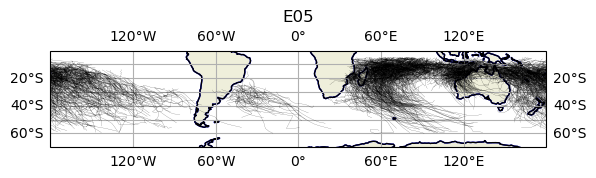

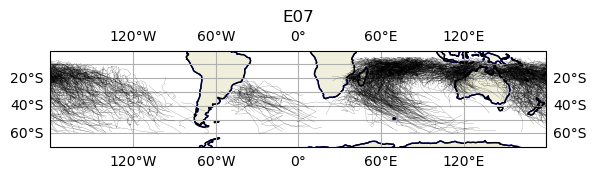

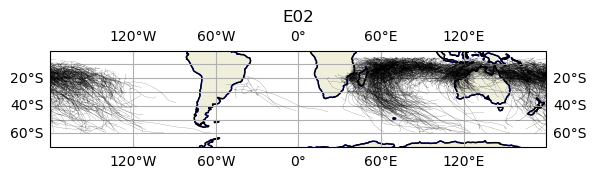

CPU times: user 49.5 s, sys: 313 ms, total: 49.8 s
Wall time: 59.6 s


In [12]:
%%time
dir_hr   = '/glade/campaign/mmm/c3we/done/pcast/CESM_HR/'
dirs = [ff for ff in glob.glob(dir_hr + "*")]

year_s = 1980
year_e = 2020

# Prepare color map based on vortex center maximum wind speed
cmap=plt.cm.jet
norm=co.Normalize(vmin=9, vmax=100)
colors=plt.cm.ScalarMappable(norm,cmap)

for dir in dirs:
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    ax.set_extent([-180, 180, -70, 0])
    ax.add_feature(cfeature.OCEAN,facecolor='white')
    ax.add_feature(cfeature.LAND, edgecolor='b')
    ax.set_title(dir[len(dir_hr) + 8:-4]  )
       
    for year in range(year_s, year_e + 1):
        name = dir[len(dir_hr) + 8:-4]       
        flnm = dir + '/' + 'CESM_HR_TC_'+ name+'_output_' + str(year) + '_SH.txt'
        #print(flnm)  
        df_tc = pd.read_csv(flnm, delimiter=', ', engine='python')
        df = df_tc.loc[df_tc['year'].astype(int) == year]
        tc_ids = np.unique(df.track_id.astype(int))
        
        for tc_id in tc_ids:
            df_single = df.loc[df.track_id.astype(int) == tc_id]
             
            lat_1d = df_single.lat.values.astype(float) 
            lon_1d = df_single.lon.values.astype(float) 
            spd_1d = df_single.wind10.values.astype(float)/kt2ms  
            
            # discontinue at 180
            if  (lon_1d.max() - lon_1d.min()) >180:
                lon_1d =np.where(lon_1d > 180, lon_1d-360, lon_1d)
            
            col=colors.to_rgba(spd_1d)
            ax.plot(lon_1d, lat_1d, color='k', linewidth=0.1, transform=ccrs.PlateCarree()) 
     
    plt.show()
    

#### 3.2 tracks with intensity for each member

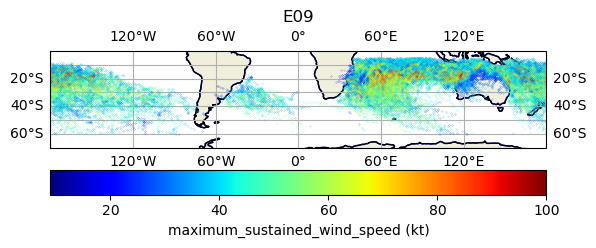

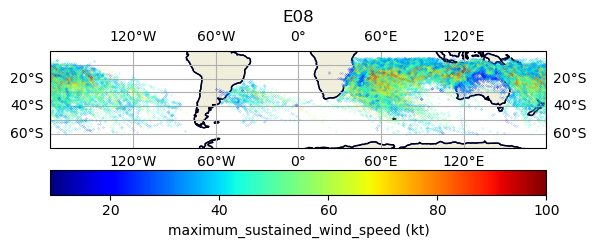

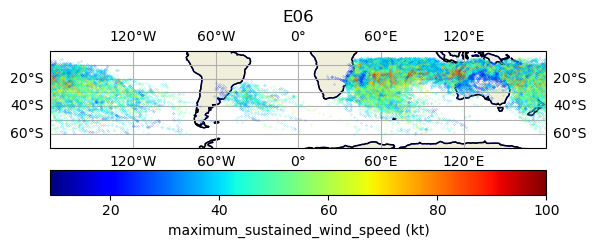

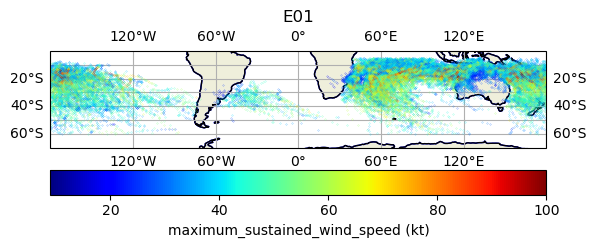

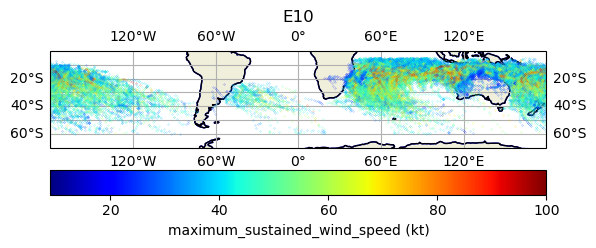

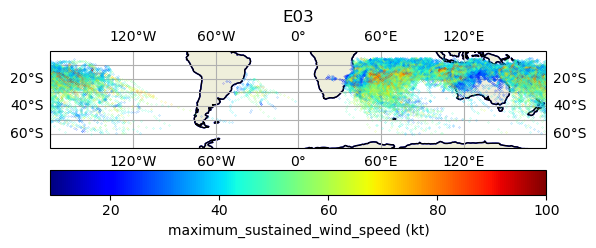

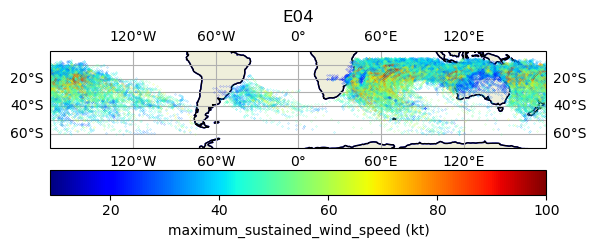

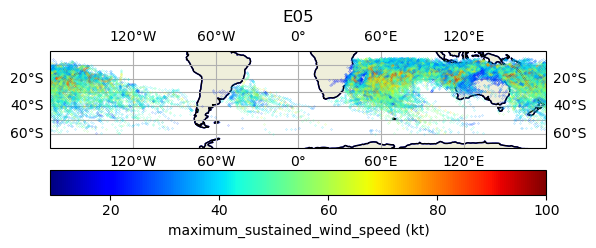

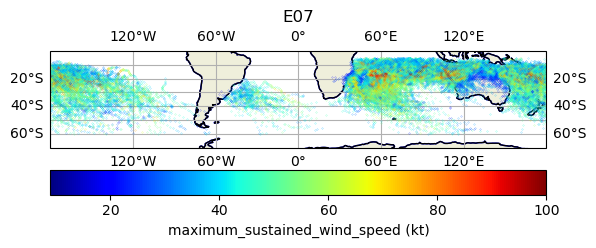

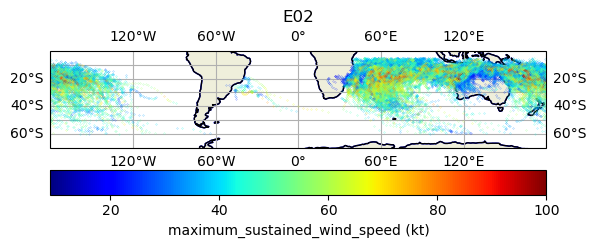

CPU times: user 20min 36s, sys: 19.3 s, total: 20min 55s
Wall time: 22min 48s


In [9]:
%%time
dir_hr   = '/glade/campaign/mmm/c3we/done/pcast/CESM_HR/'
dirs = [ff for ff in glob.glob(dir_hr + "*")]

year_s = 1980
year_e = 2020

# Prepare color map based on vortex center maximum wind speed
cmap=plt.cm.jet
norm=co.Normalize(vmin=9, vmax=100)
colors=plt.cm.ScalarMappable(norm,cmap)

for dir in dirs:
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    ax.set_extent([-180, 180, -70, 0])
    ax.add_feature(cfeature.OCEAN,facecolor='white')
    ax.add_feature(cfeature.LAND, edgecolor='b')
    ax.set_title(dir[len(dir_hr) + 8:-4]  )
       
    for year in range(year_s, year_e + 1):
        name = dir[len(dir_hr) + 8:-4]       
        flnm = dir + '/' + 'CESM_HR_TC_'+ name+'_output_' + str(year) + '_SH.txt'
        #print(flnm)  
        df_tc = pd.read_csv(flnm, delimiter=', ', engine='python')
        df = df_tc.loc[df_tc['year'].astype(int) == year]
        tc_ids = np.unique(df.track_id.astype(int))
        
        for tc_id in tc_ids:
            df_single = df.loc[df.track_id.astype(int) == tc_id]
             
            lat_1d = df_single.lat.values.astype(float) 
            lon_1d = df_single.lon.values.astype(float) 
            spd_1d = df_single.wind10.values.astype(float)/kt2ms  
            
            # discontinue at 180
            if  (lon_1d.max() - lon_1d.min()) >180:
                lon_1d =np.where(lon_1d > 180, lon_1d-360, lon_1d)
            
            col=colors.to_rgba(spd_1d)          
            #ax.plot(lon_1d, lat_1d, color='k', linewidth=0.1, transform=ccrs.PlateCarree()) 
     
            for nn in range(len(lon_1d)):        
                ax.plot(lon_1d[nn], lat_1d[nn],  marker='.', markersize=0.3, color=col[nn,:], transform=ccrs.PlateCarree())
    plt.colorbar(colors,fraction=0.1, pad=0.06,label='maximum_sustained_wind_speed (kt)', orientation='horizontal')            
    plt.show()
    